<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - ALS nDCG</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als
from lenskit.algorithms.als import BiasedMF
from lenskit import topn
import pandas as pd
import numpy as np

ratings = pd.read_csv('D:\\Escritorio\\UM\\Tesis\\ML 1M\\ratings.dat', sep='::',engine='python',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # Entrenamos el algoritmo con el training dataset
    users = test.user.unique() # Devuelve un array con los users unicos en el testing dataset
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

In [3]:
def model_trainer(features,reg):
    all_recs = []
    test_data = []
    
    features=int(features)
    als = BiasedMF(features=features, iterations=100, reg=reg, damping=5, bias=True,  progress=None) # define algorithm
    
    for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
        test_data.append(test) # save testing data
        all_recs.append(eval('ALS', als, train, test))
    
    all_recs = pd.concat(all_recs, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    rla = topn.RecListAnalysis()
    rla.add_metric(topn.ndcg)
    results = rla.compute(all_recs, test_data)
                          
    return results["ndcg"].mean()

In [4]:
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(params):
    features = params['features']
    reg = params['reg']
    metric = model_trainer(features,reg)
    print([features,reg,metric],',')
    return {'loss': -metric, 'status': STATUS_OK}

space={'features': hp.uniform('features', 1, 100),
       'reg': hp.uniform('reg',0.01,0.4)}

best = fmin(objective, space, algo=tpe.suggest,max_evals=100)

[52.1528176841402, 0.22011662571586327, 0.10108499566113051]                                                           
,                                                                                                                      
[77.78048638685253, 0.05027949591608963, 0.10206838763512023]                                                          
,                                                                                                                      
[84.63431081256181, 0.02285008285471317, 0.101664597125936]                                                            
,                                                                                                                      
[12.792604580324486, 0.200920561112229, 0.09478944449438845]                                                           
,                                                                                                                      
[88.32589164673504, 0.06599620876708241,

[3.451526418661288, 0.03244087002792432, 0.0863330379546476]                                                           
,                                                                                                                      
[57.80394476833976, 0.01348477118746623, 0.10165833588752801]                                                          
,                                                                                                                      
 36%|███████████████▍                           | 36/100 [2:16:29<2:54:27, 163.55s/it, best loss: -0.10312819628482864]


KeyboardInterrupt: 

In [4]:
array = [[96.4929788072711, 0.032493611531331484, 0.10251406841298602]               #256.64/67                                           
,                                                                                                                      
[9.450191463211725, 0.10505858508833935, 0.09236206590841109]                                                          
,                                                                                                                      
[45.47095978307044, 0.2524277390232612, 0.10322377736727206]                                                           
,                                                                                                                      
[25.08205393914211, 0.3221358228861018, 0.09896152302269087]                                                           
,                                                                                                                      
[28.614951366081986, 0.28694022893859517, 0.09878607411399334]                                                         
,                                                                                                                      
[81.21987147934998, 0.21985434272936025, 0.10264756678808523]                                                          
,                                                                                                                      
[57.27067187673048, 0.14458678952757734, 0.10153219644297842]                                                          
,                                                                                                                      
[26.55213828059832, 0.3809653365366246, 0.09956574608906765]                                                           
,                                                                                                                      
[49.65322869743939, 0.27437815243484937, 0.10217203638595182]                                                          
,                                                                                                                      
[57.743630937830766, 0.21407673662019702, 0.1006689440115486]                                                          
,                                                                                                                      
[93.51584894887813, 0.08422344898872862, 0.10291190751838769]                                                          
,                                                                                                                      
[18.30671583731655, 0.2880653761864562, 0.0964320656876105]                                                            
,                                                                                                                      
[56.257342944240435, 0.1567480194710923, 0.10083366863495219]                                                          
,                                                                                                                      
[20.54231533637222, 0.11944463580375315, 0.09739257540185788]                                                          
,                                                                                                                      
[48.211992948614025, 0.03107356784508082, 0.10196210004871398]                                                         
,                                                                                                                      
[65.67507183260463, 0.012117358854150528, 0.10236005904743069]                                                         
,                                                                                                                      
[77.25828824458623, 0.3040647221973698, 0.10214628325544457]                                                           
,                                                                                                                      
[76.26989974114109, 0.34692655976698605, 0.10297740702742715]                                                          
,                                                                                                                      
[2.0022645192486355, 0.3174061110916729, 0.0859021873880331]                                                           
,                                                                                                                      
[71.07073901212193, 0.26634303873677695, 0.10116244586877737]                                                          
,                                                                                                                      
[44.44083162671661, 0.35977919270493663, 0.10047439019046195]                                                          
,                                                                                                                      
[36.78594885309075, 0.35280136553157787, 0.10145436392534672]                                                          
,                                                                                                                      
[87.53790619929205, 0.23347824754711952, 0.10257998693910148]                                                          
,                                                                                                                      
[38.470752701474325, 0.24556490442034248, 0.10086579247506143]                                                         
,                                                                                                                      
[66.71799722841556, 0.39185265805816755, 0.1031407942904866]                                                           
,                                                                                                                      
[67.07373257284053, 0.3987580531305087, 0.10210678915303366]                                                           
,                                                                                                                      
[36.579734276391065, 0.1607905400552161, 0.10031379810465331]                                                          
,                                                                                                                      
[62.88408873885041, 0.196052552323953, 0.10090368125919195]                                                            
,                                                                                                                      
[92.46505797405102, 0.06775035318330683, 0.10209334918182987]                                                          
,                                                                                                                      
[42.542568870255025, 0.1894672879761499, 0.10173056934879611]                                                          
,                                                                                                                      
[82.42051039478457, 0.3702316456912538, 0.1036341446358041]                                                            
,                                                                                                                      
[83.6291575110918, 0.25485742739967016, 0.10078402652775072]                                                           
,                                                                                                                      
[2.7555720785233078, 0.33162378832666783, 0.08536785584153056]                                                         
,                                                                                                                      
[12.785270821108519, 0.37476214332814717, 0.09436119263258322]                                                         
,                                                                                                                      
[97.30519943757969, 0.1773761684005823, 0.10046857175955456]                                                           
,                                                                                                                      
[31.90551562891132, 0.29697281256332275, 0.10153377251062909]                                                          
,                                                                                                                      
[55.38112825301018, 0.1276002208712087, 0.10156540197050701]                                                           
,                                                                                                                      
[74.01700564644081, 0.22719145014152078, 0.10171868858926623]                                                          
,                                                                                                                      
[51.95366979736448, 0.32032562535072373, 0.09929788733008925]                                                          
,                                                                                                                      
[29.16963996554537, 0.08180082445024617, 0.09891277087452603]                                                          
,                                                                                                                      
[86.03310254065941, 0.27410945007087784, 0.10122775322938914]                                                          
,                                                                                                                      
[59.53020490766527, 0.34302463760140833, 0.10131422318564708]                                                          
,                                                                                                                      
[22.78550245423456, 0.3788627476159193, 0.09668443874146787]                                                           
,                                                                                                                      
[11.44350847233276, 0.216552557130412, 0.09207153060679557]                                                            
,                                                                                                                      
[80.33330217368422, 0.2516060577910818, 0.10131759182373164]                                                           
,                                                                                                                      
[45.739657140250195, 0.30977511052595835, 0.10157545687515172]                                                         
,                                                                                                                      
[52.96060863756662, 0.2895920933054209, 0.10237167385274416]                                                           
,                                                                                                                      
[15.657595798335652, 0.3687291636749006, 0.09635697002078275]                                                          
,                                                                                                                      
[71.15537305399148, 0.05229321980952373, 0.10117184847827221]                                                          
,                                                                                                                      
[92.92212349850689, 0.13072558158810357, 0.10083753240717672]                                                          
,                                                                                                                      
[60.50754345037857, 0.3296639226289886, 0.10191630352403817]                                                           
,                                                                                                                      
[49.12133213147828, 0.20537087534719817, 0.10127817130318058]                                                          
,                                                                                                                      
[41.72677555496139, 0.1095073606410501, 0.09986226451289151]                                                           
,                                                                                                                      
[32.402955658081666, 0.17816929770391682, 0.10048012887290361]                                                         
,                                                                                                                      
[25.495736800552404, 0.23790439875835964, 0.09793181332282054]                                                         
,                                                                                                                      
[89.63339595724597, 0.28127354646995617, 0.10164746316782733]                                                          
,                                                                                                                      
[78.51247739305806, 0.3960173012249587, 0.10255289922859392]                                                           
,                                                                                                                      
[71.65062961972903, 0.14857045674669184, 0.10245188935865428]                                                          
,                                                                                                                      
[62.585359131504276, 0.3608366892931187, 0.10118591462674731]                                                          
,                                                                                                                      
[4.07288668484226, 0.26988580111987803, 0.08905735064015641]                                                           
,                                                                                                                      
[5.913033775917441, 0.38454055327057507, 0.09027285063204442]                                                          
,                                                                                                                      
[39.63735223038295, 0.020784307379183964, 0.09983968582614197]                                                         
,                                                                                                                      
[47.0295009705186, 0.2608192691800669, 0.10138504180157505]                                                            
,                                                                                                                      
[99.6596937102976, 0.3430447337998642, 0.10084781993048765]                                                            
,                                                                                                                      
[68.01652437284692, 0.16719794949793113, 0.10059573130818382]                                                          
,                                                                                                                      
[75.17763501499816, 0.3902535979056293, 0.10226844769337595]                                                           
,                                                                                                                      
[64.988265506958, 0.3045329057741227, 0.10248448353699577] ]

In [7]:
metric = pd.DataFrame(array)
metric.columns = ['features','reg','nDCG']
metric.head(5)

,features,reg,nDCG
0,78.818121,0.314249,0.137585
1,40.891025,0.246660,0.131888
2,10.009956,0.368196,0.118971
3,70.343925,0.028243,0.138269
4,89.965100,0.064762,0.137751


In [8]:
metric.sort_values(by=['nDCG'],ascending=False).head(10)

,features,reg,nDCG
75,56.141376,0.173986,0.143689
36,74.735565,0.140755,0.143235
38,74.086928,0.189947,0.142100
42,72.794117,0.248366,0.141760
64,82.801112,0.096371,0.141402
25,64.507376,0.174993,0.140944
17,64.328946,0.016143,0.140537
23,62.834582,0.356576,0.140381
24,60.851638,0.344715,0.140323
59,61.408329,0.325180,0.140100


In [9]:
metric.to_csv('metric_nDCG.csv', index=False)

In [3]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\Alternating Least Squares\\results\\metric_nDCG.csv', sep=',')

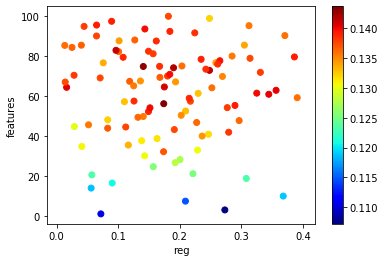

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
colormap = cm.hot
x = metric['reg']
y = metric['features'] 
c = metric['nDCG']


fig = plt.figure()
img = plt.scatter(x, y, c=c, cmap=plt.jet())
plt.xlabel('reg')
plt.ylabel('features')
fig.colorbar(img)
plt.show()